In [ ]:
##IMPORTING LIBRARIES

In [6]:
import numpy as np
import pandas as pd
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plotter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn. ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [7]:
##LOADIND THE DATASET
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [8]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [9]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [10]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
##ADDING THE TARGET COLUMN TO THE DATA FRAME
data_frame['diagnosis'] = breast_cancer_dataset.target

In [12]:
## 1 = BENIGN,  0 = MALIGNANT
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [13]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
data_frame.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

In [15]:
mean_features = list(data_frame.columns[0:10])
error_features = list(data_frame.columns[10:20])
worst_features = list(data_frame.columns[20:30])

print(worst_features)

['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [16]:
mean_features.append('diagnosis')
error_features.append('diagnosis')
worst_features.append('diagnosis')

In [17]:
corr1 = data_frame[mean_features].corr().abs()
corr2 = data_frame[error_features].corr().abs()
corr3 = data_frame[worst_features].corr().abs()

In [18]:
corr1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,diagnosis
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.708984
mean smoothness,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.330499
mean fractal dimension,0.311631,0.076437,0.261477,0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.012838


In [19]:
corr2

,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,diagnosis
radius error,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.567134
texture error,0.213247,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,0.008303
perimeter error,0.972794,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143,0.556141
area error,0.951830,0.111567,0.937655,1.000000,0.075150,0.284840,0.270895,0.415730,0.134109,0.127071,0.548236
smoothness error,0.164514,0.397243,0.151075,0.075150,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,0.067016
compactness error,0.356065,0.231700,0.416322,0.284840,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269,0.292999
concavity error,0.332358,0.194998,0.362482,0.270895,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372,0.253730
concave points error,0.513346,0.230283,0.556264,0.415730,0.328429,0.744083,0.771804,1.000000,0.312780,0.611044,0.408042
symmetry error,0.240567,0.411621,0.266487,0.134109,0.413506,0.394713,0.309429,0.312780,1.000000,0.369078,0.006522
fractal dimension error,0.227754,0.279723,0.244143,0.127071,0.427374,0.803269,0.727372,0.611044,0.369078,1.000000,0.077972


In [20]:
corr3

,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
worst radius,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,0.776454
worst texture,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122,0.456903
worst perimeter,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,0.782914
worst area,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,0.733825
worst smoothness,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624,0.421465
worst compactness,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,0.590998
worst concavity,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,0.659610
worst concave points,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,0.793566
worst symmetry,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,0.416294
worst fractal dimension,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,0.323872


In [21]:
prediction_vars = ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 
                   'mean concave points', 'radius error', 'perimeter error', 'area error'
                   , 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 
                   'worst concave points', 'worst compactness']

In [22]:
dataframe_corr = data_frame.corr()

In [23]:
dataframe_mean = data_frame[["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness", "mean compactness", "mean concavity", "mean concave points", "mean symmetry", "mean fractal dimension", "diagnosis"]]

<Axes: >

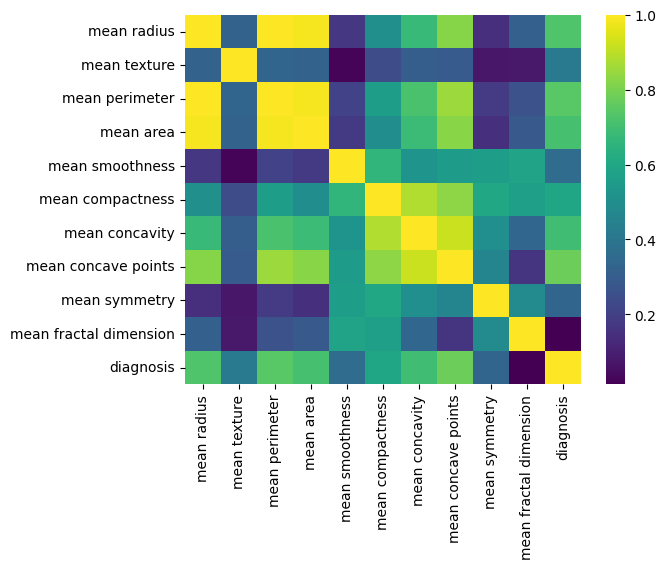

In [24]:
sns.heatmap(dataframe_mean.corr().abs(), cmap = "viridis")

In [25]:
dataframe_error = data_frame[["radius error", "texture error", "perimeter error", "area error", "smoothness error", "concavity error", "concave points error", "symmetry error", "fractal dimension error", "diagnosis"]]

<Axes: >

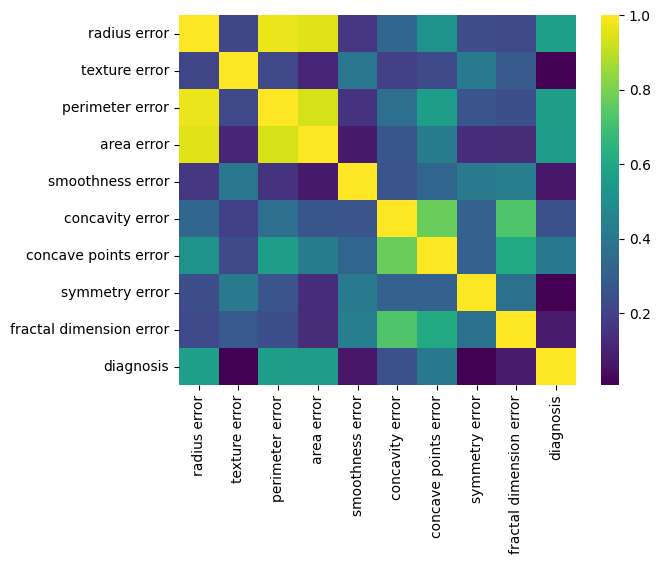

In [26]:
sns.heatmap(dataframe_error.corr().abs(), cmap = "viridis")

In [27]:
dataframe_worst = data_frame[["worst radius", "worst texture", "worst perimeter", "worst area", "worst smoothness", "worst compactness", "worst concavity", "worst concave points", "worst symmetry", "worst fractal dimension", "diagnosis"]]

<Axes: >

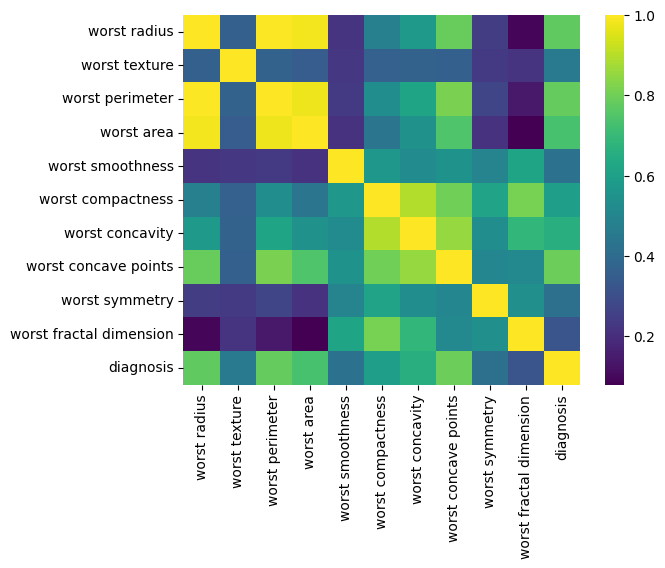

In [28]:
sns.heatmap(dataframe_worst.corr().abs(), cmap = 'viridis')

In [91]:
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [92]:
##CHECKING THE DISTRUBUTION OF THE TARGET VARIABLE
data_frame['diagnosis'].value_counts()


diagnosis
1    357
0    212
Name: count, dtype: int64

In [93]:
data_frame.groupby('diagnosis').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [94]:
##SEPARATING THE FEATURES & THE TARGET COLUMN
X = data_frame.drop(columns='diagnosis', axis=1)
Y = data_frame['diagnosis']
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [95]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int32


In [96]:
##SPLITTING INTO TRAINING DATA & TESTING DATA
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
##0.2 => 20% of data will be for testing, automatically 80% will be for training

In [97]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [98]:
##TRAINING THE MODEL USING RFC WITHOUT FEATURE SELECTION
model = RandomForestClassifier()

In [99]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [100]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
test_data_precision = precision_score(Y_test, X_test_prediction)
test_data_recall = recall_score(Y_test, X_test_prediction)
test_data_f1 = f1_score(Y_test, X_test_prediction)

In [101]:
print('Accuracy on RFC test data is = ', test_data_accuracy)
print('Precision on RFC test data is = ', test_data_precision)
print('Recall on RFC test data is = ', test_data_recall)
print('F1 score on RFC test data is = ', test_data_f1)
confusion_matrix(Y_test, X_test_prediction)

Accuracy on RFC test data is =  0.956140350877193
Precision on RFC test data is =  0.9466666666666667
Recall on RFC test data is =  0.9861111111111112
F1 score on RFC test data is =  0.9659863945578231


array([[38,  4],
       [ 1, 71]], dtype=int64)

In [102]:
##TRYING RFC WITH FEATURE SELECTION
train, test = train_test_split(data_frame, test_size=0.2, random_state=1)

train_x = train[prediction_vars]
train_y = train['diagnosis']
test_x = train[prediction_vars]
test_y = train['diagnosis']

In [103]:
newmodel = RandomForestClassifier()

In [104]:
newmodel.fit(train_x, train_y)

RandomForestClassifier()

In [105]:
newmodel_prediction = newmodel.predict(test_x)
test_data_accuracy4 = accuracy_score(test_y, newmodel_prediction)
test_data_precision4 = precision_score(test_y, newmodel_prediction)
test_data_recall4 = recall_score(test_y, newmodel_prediction)
test_data_f14 = f1_score(test_y, newmodel_prediction)

In [106]:
print('Accuracy on RFC test data is = ', test_data_accuracy4)
print('Precision on RFC test data is = ', test_data_precision4)
print('Recall on RFC test data is = ', test_data_recall4)
print('F1 Score on RFC test data is = ', test_data_f14)
confusion_matrix(test_y, newmodel_prediction)

Accuracy on RFC test data is =  1.0
Precision on RFC test data is =  1.0
Recall on RFC test data is =  1.0
F1 Score on RFC test data is =  1.0


array([[170,   0],
       [  0, 285]], dtype=int64)

In [107]:
## prediction_vars = ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 
##                  'mean concave points', 'radius error', 'perimeter error', 'area error'
##                   , 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 
##                   'worst concave points', 'worst compactness']
example_input_data2 = (18.25,119.6,1040,0.1127,0.074,0.1794,0.4467,0.7732,0.01369,22.88,27.66,0.1442,0.2576,1606)

##changing the input data to a numpy array
input_data_as_numpy_array2 = np.asarray(example_input_data2)

##reshaping the array to predict for only the diagnosis
input_data_reshaped2 = input_data_as_numpy_array2.reshape(1,-1)

prediction2 = newmodel.predict(input_data_reshaped2)
print(prediction2)

##MALIGNANT = 0 & BENIGN = 1

if (prediction2[0] == 0):
    print('The breast tumor is malignant')

else:
    print('The breast tumor is Benign')


[1]
The breast tumor is Benign


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
